In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
%matplotlib inline
filterwarnings(action='ignore')

In [3]:
df=pd.read_csv("IRIS.csv")
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
#We can see that 3 Rows is dropped because the rows are Duplicates.We had 150 Rows but after using df.drop_duplicates
#(inplace=True) 3 Rows is dropped
df.drop_duplicates(inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


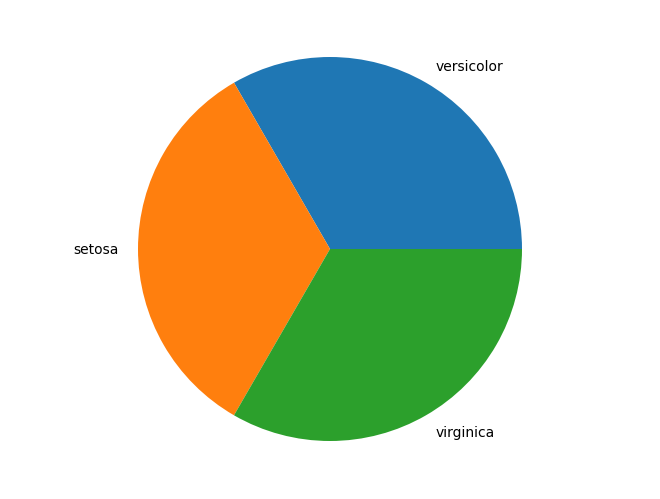

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['versicolor', 'setosa', 'virginica']
s = [25,25,25]
ax.pie(s, labels = l)
plt.show()

<Axes: xlabel='species', ylabel='sepal_length'>

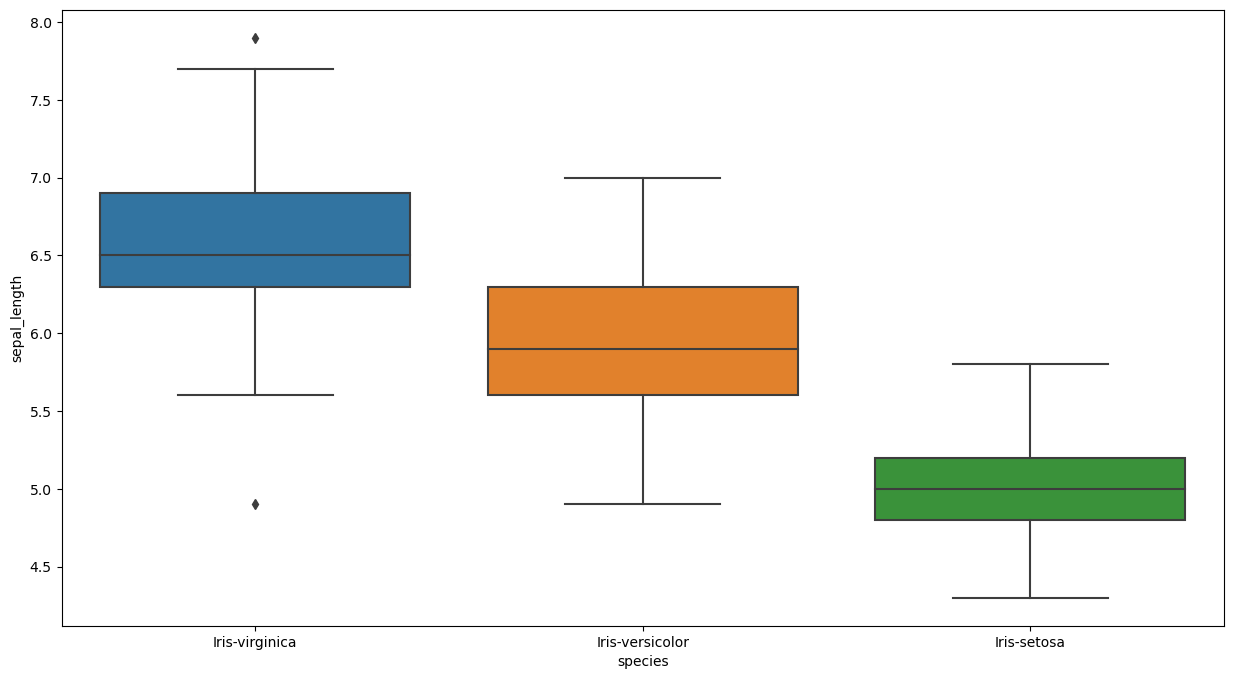

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(x='species',y='sepal_length',data=df.sort_values('sepal_length',ascending=False))

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

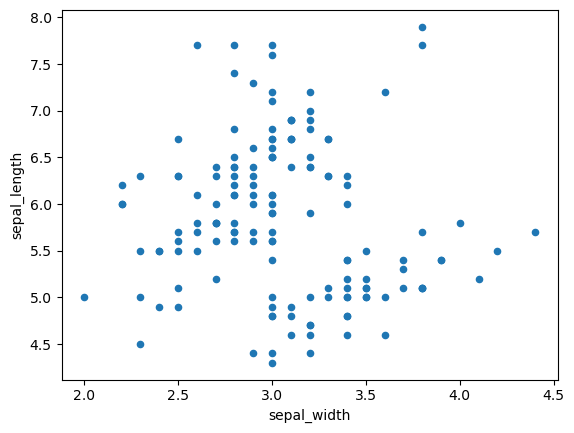

In [18]:
df.plot(kind='scatter',x='sepal_width',y='sepal_length')

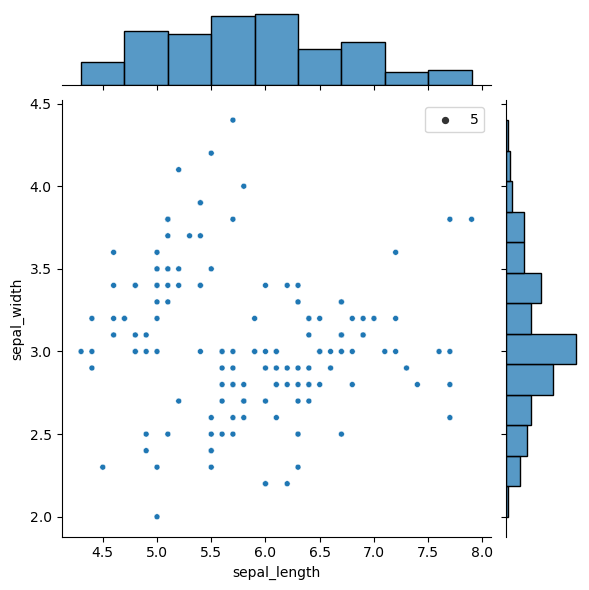

In [19]:
sns.jointplot(x="sepal_length", y="sepal_width", data=df, size=5)

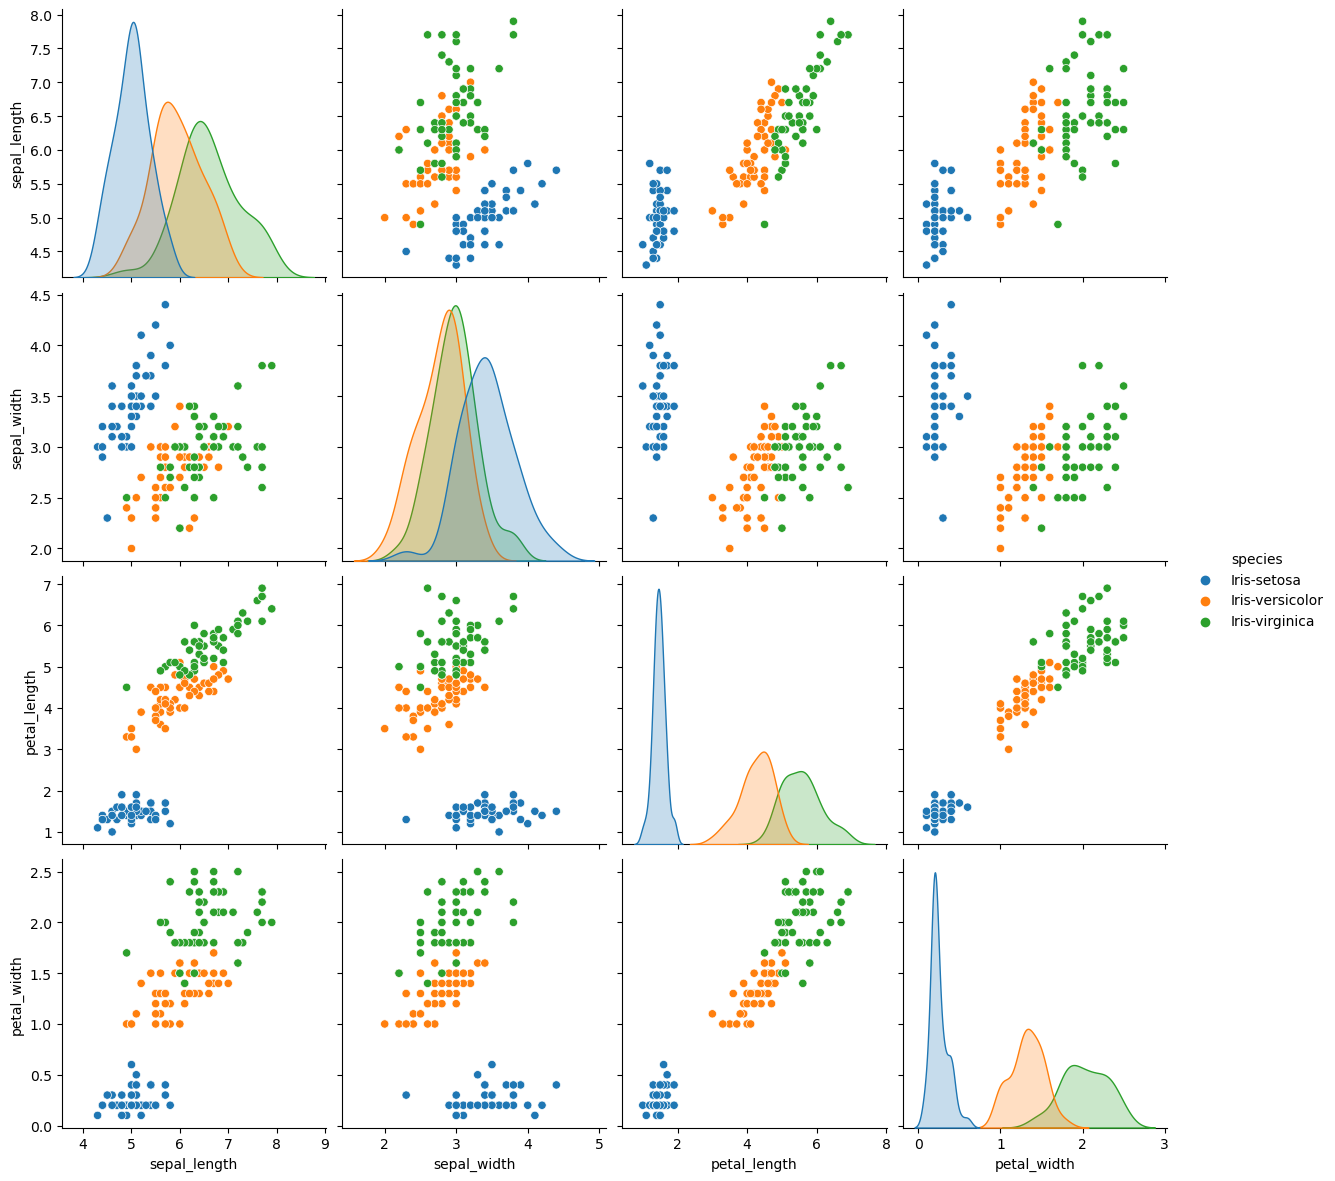

In [20]:
sns.pairplot(df, hue="species", size=3)

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

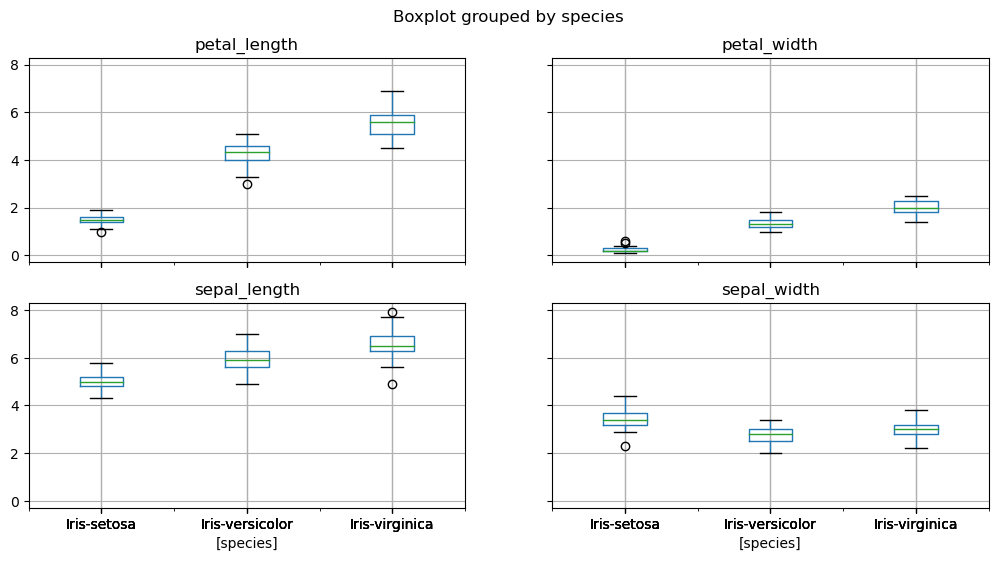

In [21]:
df.boxplot(by="species", figsize=(12, 6))

In [24]:
X= df[['sepal_length','sepal_width','petal_length','petal_width']]
y= df['species']

In [25]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()
lr.fit(X,y)
lr.fit(X_train,y_train)

LogisticRegression()

In [30]:
predictions = lr.predict(X)
Scores = pd.DataFrame({'Actual':y,'Predictions':predictions})
Scores.head()

,Actual,Predictions
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa


In [31]:
y_test_hat=lr.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_hat)*100,'%')

93.33333333333333 %


# Thank You